## 15.2.2 Loading the Dataset

**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [178]:
%matplotlib inline
from sklearn.datasets import load_digits

In [179]:
digits = load_digits()

### Displaying the Description

In [180]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### Checking the Sample and Target Sizes  

This section checks the sizes of the sample data and target arrays to ensure they match and are suitable for training and testing machine learning models. This validation step helps confirm that the dataset is correctly loaded and prepared for subsequent modeling tasks.

In [181]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [182]:
digits.data.shape

(1797, 64)

In [183]:
digits.target.shape

(1797,)

### A Sample Digit Image  

This section introduces a sample digit image from the dataset. The following code and discussion will demonstrate how to visualize individual handwritten digits, helping to understand the structure and pixel representation of the data before applying machine learning techniques for classification.

In [184]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

### Preparing the Data for Use with Scikit-Learn  

In this section, we prepare the digits dataset for use with Scikit-Learn by organizing the sample data and target labels. This ensures the data is in the correct format for training and evaluating machine learning models, setting the stage for classification and analysis tasks.

In [185]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [186]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [187]:
digits.target[22]

np.int64(2)

## 15.2.3 Visualizing the Data
### Creating the Diagram 

In this section, we prepare to visualize the handwritten digits dataset by displaying sample images and their corresponding labels. This helps us understand the structure and appearance of the data before applying machine learning techniques for classification.

In [188]:
import matplotlib.pyplot as plt

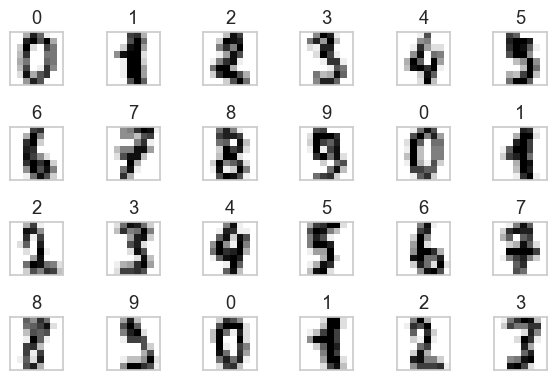

In [189]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

### Displaying Each Image and Removing the Axes Labels 

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()     

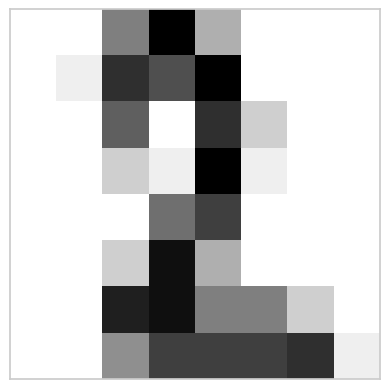

In [190]:
axes = plt.subplot()

image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)

xticks = axes.set_xticks([])

yticks = axes.set_yticks([])

## 15.2.4 Splitting the Data for Training and Testing 

In this section, we prepare to split the digits dataset into training and testing sets. This step is essential for evaluating how well machine learning models generalize to new, unseen data by training on one portion of the data and testing on another. The process ensures that model performance metrics reflect real-world predictive accuracy.

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)

### Training and Testing Set Sizes

In [193]:
X_train.shape

(1347, 64)

In [194]:
X_test.shape

(450, 64)

## 15.2.5 Creating the Model 

In this section, we set up the k-Nearest Neighbors (KNN) classifier model for handwritten digit recognition. The model will be trained using the prepared training data and then evaluated to test its ability to classify unseen digit images. This step is crucial for building and assessing the performance of our machine learning solution.

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [196]:
knn = KNeighborsClassifier()

## 15.2.6 Training the Model 

In this section, we begin the process of training the k-Nearest Neighbors (KNN) classifier using the training portion of the digits dataset. This step prepares the model to learn from labeled examples so it can later predict the classes of new, unseen digit images. The upcoming code will demonstrate how to fit the KNN model to the training data, setting the stage for evaluating its performance on the test set.

In [197]:
knn.fit(X=X_train, y=y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## 15.2.7 Predicting Digit Classes 
In this section, we use the trained k-Nearest Neighbors model to predict the classes of handwritten digit images from the test dataset. We compare the predicted results to the actual digit labels, analyze any misclassifications, and evaluate the model's overall accuracy. This process demonstrates how machine learning models can be used for classification tasks and how their performance can be assessed.


In [198]:
predicted = knn.predict(X=X_test)

In [199]:
expected = y_test

In [200]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [201]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [202]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [203]:
wrong

[(np.int64(5), np.int64(3)),
 (np.int64(8), np.int64(9)),
 (np.int64(4), np.int64(9)),
 (np.int64(7), np.int64(3)),
 (np.int64(7), np.int64(4)),
 (np.int64(2), np.int64(8)),
 (np.int64(9), np.int64(8)),
 (np.int64(3), np.int64(8)),
 (np.int64(3), np.int64(8)),
 (np.int64(1), np.int64(8))]

In [204]:
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

97.78%


In [205]:
wrong = []

In [206]:
for p, e in zip(predicted, expected):
      if p != e:
          wrong.append((p, e))

In [207]:
wrong

[(np.int64(5), np.int64(3)),
 (np.int64(8), np.int64(9)),
 (np.int64(4), np.int64(9)),
 (np.int64(7), np.int64(3)),
 (np.int64(7), np.int64(4)),
 (np.int64(2), np.int64(8)),
 (np.int64(9), np.int64(8)),
 (np.int64(3), np.int64(8)),
 (np.int64(3), np.int64(8)),
 (np.int64(1), np.int64(8))]

# 15.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2
## 15.3.1 Metrics for Model Accuracy 
### Estimator Method `score`

This section introduces methods for evaluating the accuracy of classification models using the k-Nearest Neighbors algorithm and the digits dataset. We will use the estimator’s `score` method to measure how well the trained model predicts digit classes on the test set, providing a straightforward metric for model performance.

In [208]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


### Confusion Matrix  

This section introduces the confusion matrix, a key tool for evaluating classification model performance. The confusion matrix summarizes the number of correct and incorrect predictions for each class, helping to identify patterns of misclassification and providing deeper insight into the strengths and weaknesses of the model beyond overall accuracy.

In [209]:
from sklearn.metrics import confusion_matrix

In [210]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [211]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

### Classification Report  

This section will present the classification report, which provides detailed metrics—including precision, recall, f1-score, and support—for each digit class. These metrics help evaluate the performance of the trained k-Nearest Neighbors classifier on the test dataset, highlighting strengths and weaknesses in the model’s predictions.

In [212]:
from sklearn.metrics import classification_report

In [213]:
names = [str(digit) for digit in digits.target_names]

In [214]:
print(classification_report(expected, predicted, 
       target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Visualizing the Confusion Matrix  

This section prepares to visualize the confusion matrix for the digit classification task. By displaying the confusion matrix as a heatmap, we can easily interpret the model’s performance, identify which digit classes are most frequently misclassified, and gain deeper insights into the strengths and weaknesses of the k-Nearest Neighbors classifier.

In [215]:
import pandas as pd

In [216]:
confusion_df = pd.DataFrame(confusion, index=range(10),
     columns=range(10))

In [217]:
import seaborn as sns

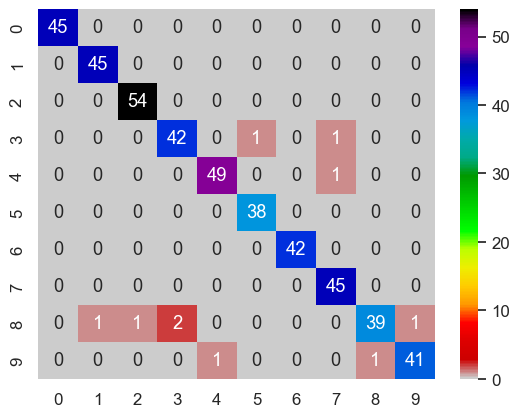

In [218]:
axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')

## 15.3.2 K-Fold Cross-Validation
### KFold Class

In [219]:
from sklearn.model_selection import KFold

In [220]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### Using the `KFold` Object with Function `cross_val_score` 

In [221]:
from sklearn.model_selection import cross_val_score

In [222]:
scores = cross_val_score(estimator=knn, X=digits.data, 
     y=digits.target, cv=kfold)

In [223]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [224]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [225]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


## 15.3.3 Running Multiple Models to Find the Best One 

In [226]:
from sklearn.svm import SVC

In [227]:
from sklearn.naive_bayes import GaussianNB

In [228]:
estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()}

In [229]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


### Scikit-Learn Estimator Diagram

## 15.3.4 Hyperparameter Tuning 

In [230]:
for k in range(1, 20, 2):
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(estimator=knn, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


## Exercise Summary

- **Data Loading & Exploration:** Loaded the digits dataset and visualized samples to understand the data structure and class distribution.
- **Data Splitting:** Split data into training and testing sets to evaluate model performance on unseen data.
- **Model Training:** Used k-Nearest Neighbors (KNN) classifier to train on the training set.
- **Prediction & Evaluation:** Predicted digit classes, calculated accuracy, and identified misclassifications to assess model effectiveness.
- **Metrics & Visualization:** Used confusion matrix and classification report for detailed performance analysis; visualized results with a heatmap.
- **Cross-Validation:** Applied k-fold cross-validation to estimate model reliability and generalization.
- **Model Comparison:** Compared KNN, SVC, and GaussianNB to find the best-performing estimator.
- **Hyperparameter Tuning:** Tested different values of *k* in KNN to optimize accuracy.

**Importance:**  
Each step ensures the model is trained, validated, and compared rigorously, providing reliable and interpretable results for digit classification.

# 15.4 Case Study: Time Series and Simple Linear Regression 
### Loading the Average High Temperatures into a `DataFrame` 

**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

# NYC January High Temperatures: Time Series & Linear Regression

This notebook analyzes average January high temperatures in NYC from 1895 to 2018 using time series analysis and simple linear regression.  
We will prepare the data, split it for training/testing, fit a regression model, make predictions, and visualize the results to understand temperature trends and model performance.

### Data Preparation
*We load and clean the dataset, ensuring correct column names and data types. This is essential for reliable analysis and modeling.*

In [231]:
%matplotlib inline
import pandas as pd

In [232]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [233]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [234]:
nyc.Date = nyc.Date.floordiv(100)

In [235]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Data Splitting
*We divide the data into training and testing sets to evaluate model performance on unseen data, which helps prevent overfitting.*

### Splitting the Data for Training and Testing

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [238]:
X_train.shape

(93, 1)

In [239]:
X_test.shape

(31, 1)

### Model Training
*We use LinearRegression to fit a model to the training data, learning the relationship between year and temperature.*

### Training the Model

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
linear_regression = LinearRegression()

In [242]:
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [243]:
linear_regression.coef_

array([0.01939167])

In [244]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Model Testing
*We predict temperatures for the test set and compare them to actual values to assess accuracy.*

### Testing the Model

In [245]:
predicted = linear_regression.predict(X_test)

In [246]:
expected = y_test

In [247]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Prediction
*We estimate temperatures for years outside the dataset to demonstrate the model's ability to extrapolate.*

### Predicting Future Temperatures and Estimating Past Temperatures 

In [248]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [249]:
predict(2019)

array([38.84399018])

In [250]:
predict(1890)

array([36.34246432])

### Visualization
*We plot the data and regression line to visually inspect the fit and trends.*

### Visualizing the Dataset with the Regression Line

In [251]:
import seaborn as sns

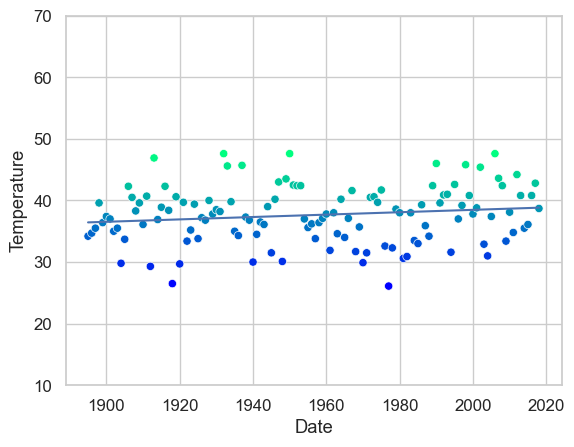

In [252]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

In [253]:
predict(1889)

array([36.32307265])

In [254]:
predict(2020)

array([38.86338185])

### Exercise Summary

In this notebook, we performed a time series analysis and simple linear regression to model and predict average January high temperatures in NYC from 1895 to 2018. The workflow included:

- **Data Preparation:** Loaded and cleaned the dataset, ensuring correct column names and data types.
- **Data Splitting:** Divided the data into training and testing sets to evaluate model performance on unseen data.
- **Model Training:** Used `LinearRegression` to fit a model to the training data, learning the relationship between year and temperature.
- **Model Testing:** Predicted temperatures for the test set and compared them to actual values, assessing accuracy.
- **Prediction:** Estimated temperatures for years outside the dataset (e.g., 1889 and 2020) to demonstrate extrapolation.
- **Visualization:** Plotted the data and regression line to visually inspect the fit and trends.

**Importance:**  
These steps are crucial for understanding how well a regression model generalizes to new data, identifying trends, and making informed predictions. Splitting data and testing on unseen samples helps prevent overfitting and ensures the model's reliability for future forecasting. Visualization aids in interpreting results and communicating findings effectively.

In the upcoming section, we will evaluate the performance of our trained multiple linear regression model using the California housing dataset. This involves generating predictions for the test data and comparing them to the actual values. By visualizing the expected versus predicted prices and calculating key regression metrics such as R² and mean squared error, we will assess how well the model generalizes to unseen data and determine its accuracy in predicting median house values.

# 15.5 Case Study: Multiple Linear Regression with the California Housing Dataset
## 15.5.1 Loading the Dataset
### Loading the Data
**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [255]:
%matplotlib inline
from sklearn.datasets import fetch_california_housing

In [256]:
california = fetch_california_housing()

### Displaying the Dataset’s Description

In [257]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [258]:
california.data.shape

(20640, 8)

In [259]:
california.target.shape

(20640,)

In [260]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## 15.5.2 Exploring the Data with Pandas

In [261]:
import pandas as pd

In [262]:
pd.set_option('display.precision', 4)

In [263]:
pd.set_option('display.max_columns', 9)

In [264]:
pd.set_option('display.width', None)

In [265]:
california_df = pd.DataFrame(california.data, 
                              columns=california.feature_names)
 

In [266]:
california_df['MedHouseValue'] = pd.Series(california.target)

In [267]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [268]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


## 15.5.3 Visualizing the Features 

In [269]:
sample_df = california_df.sample(frac=0.1, random_state=17)

In [270]:
import matplotlib.pyplot as plt

In [271]:
import seaborn as sns

In [272]:
sns.set(font_scale=2)

In [273]:
sns.set_style('whitegrid')                                    

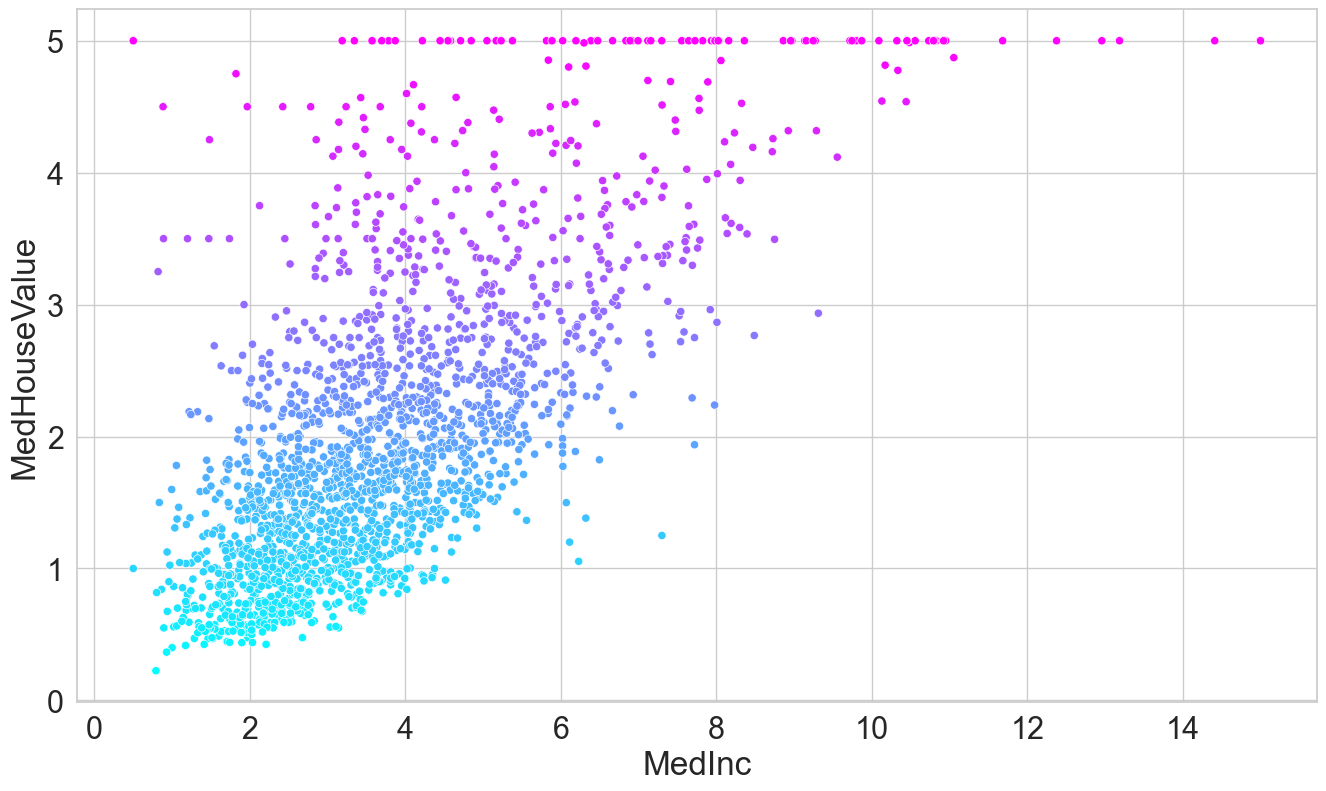

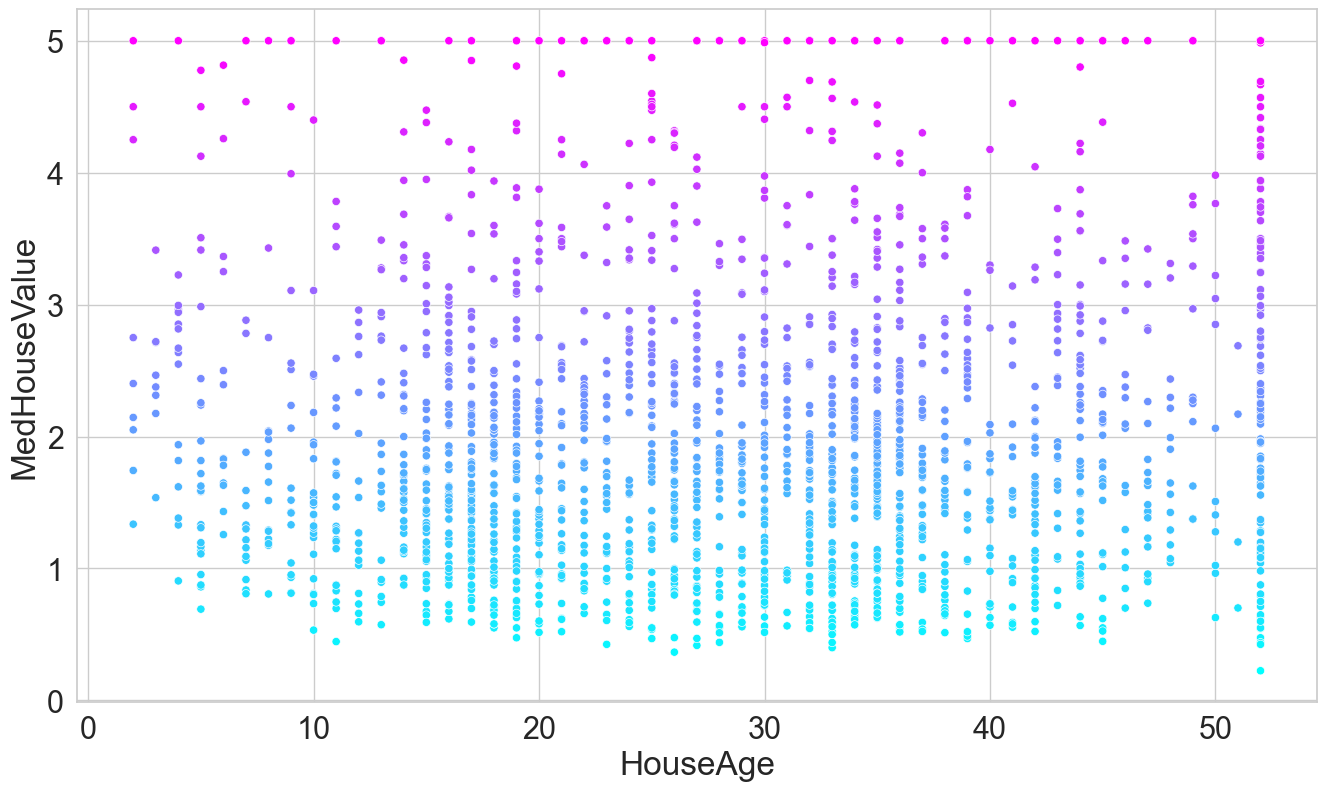

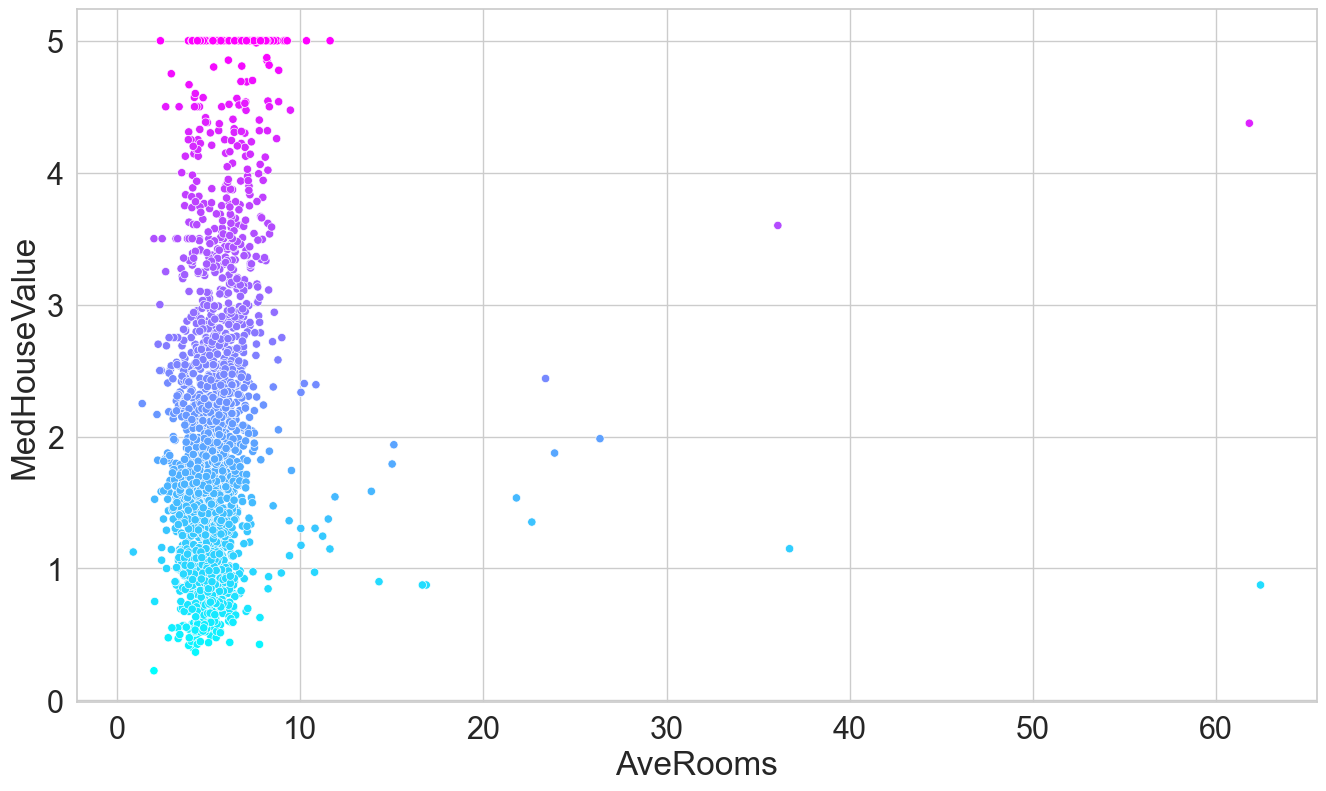

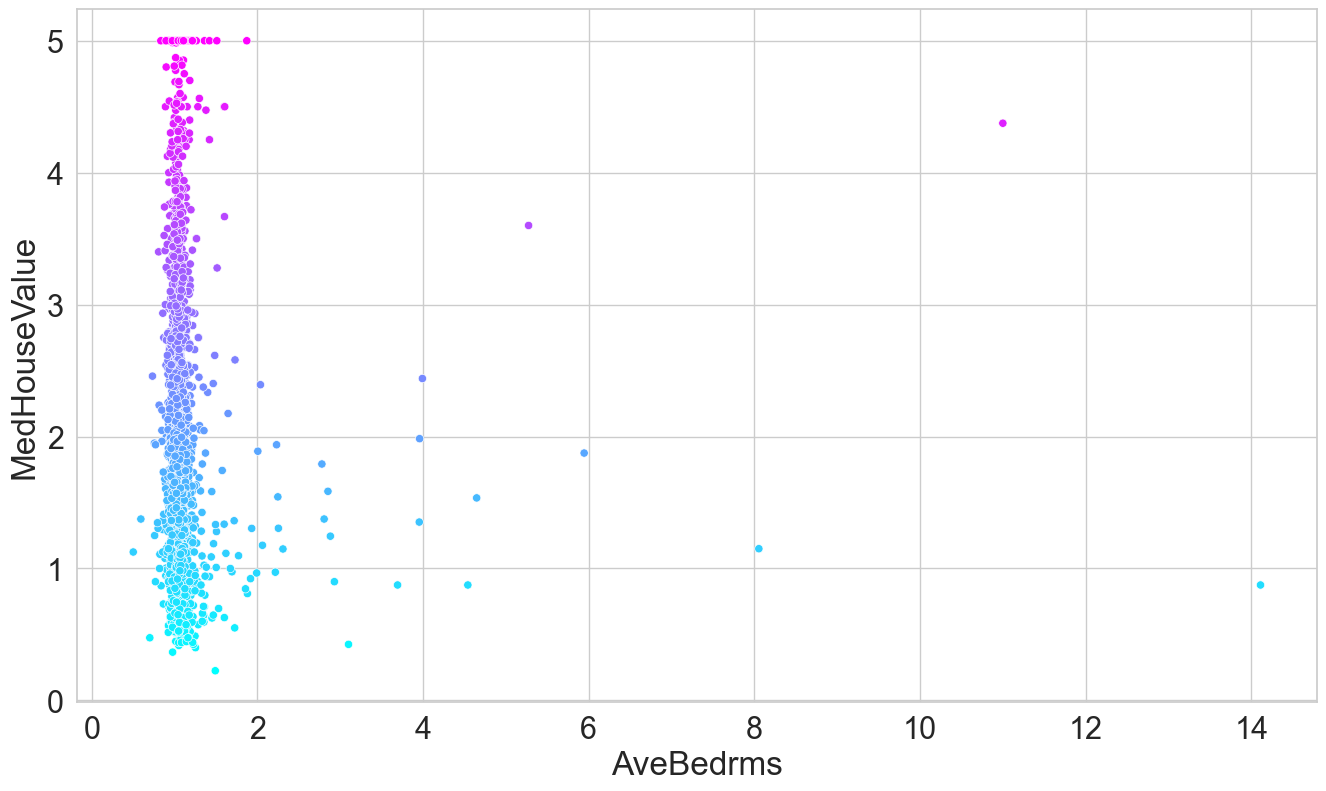

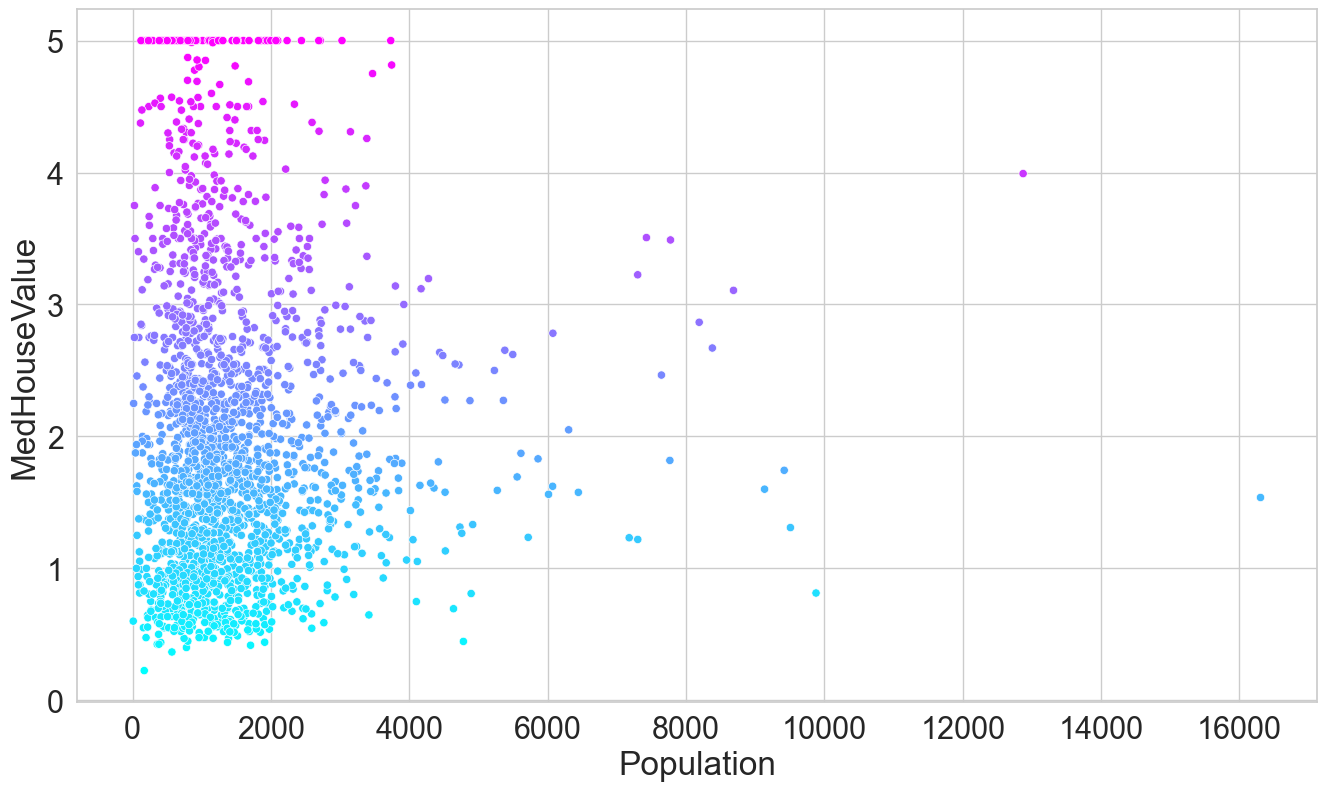

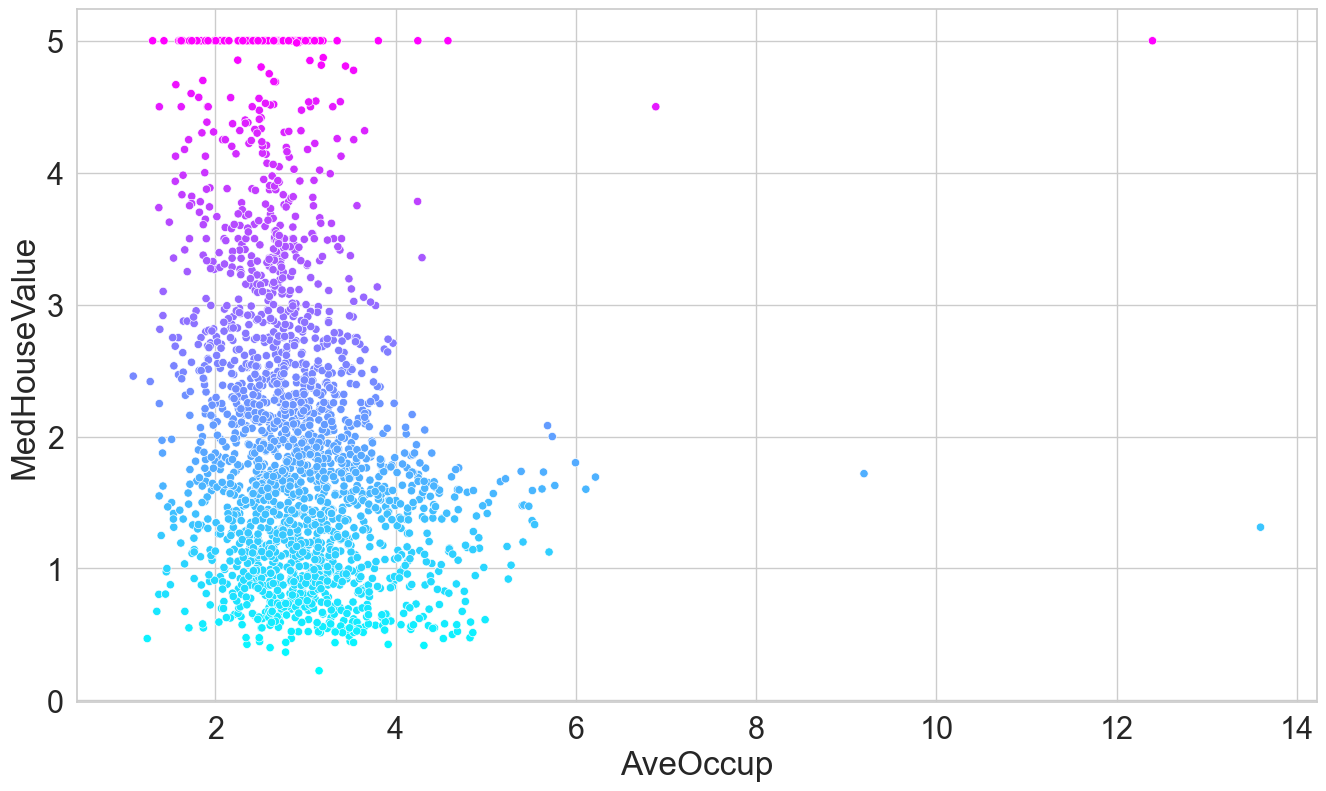

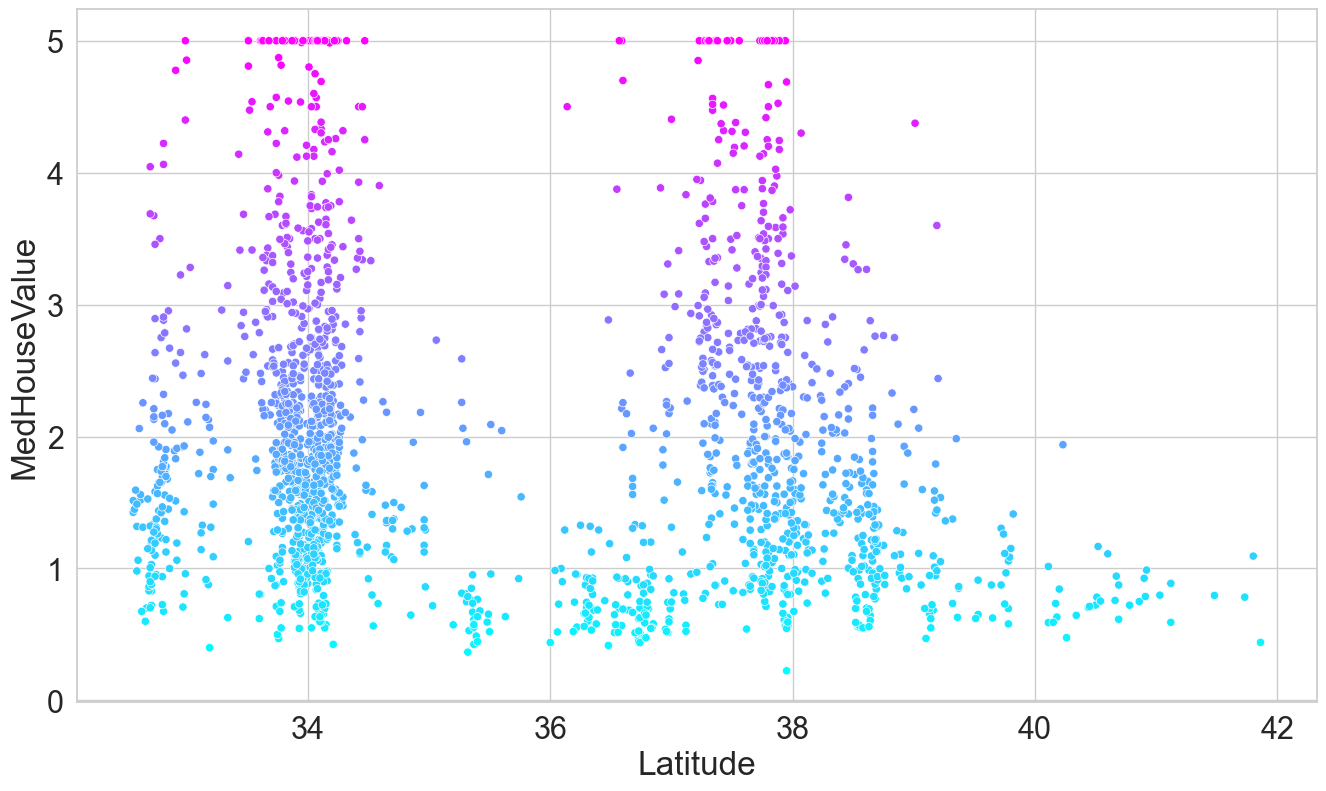

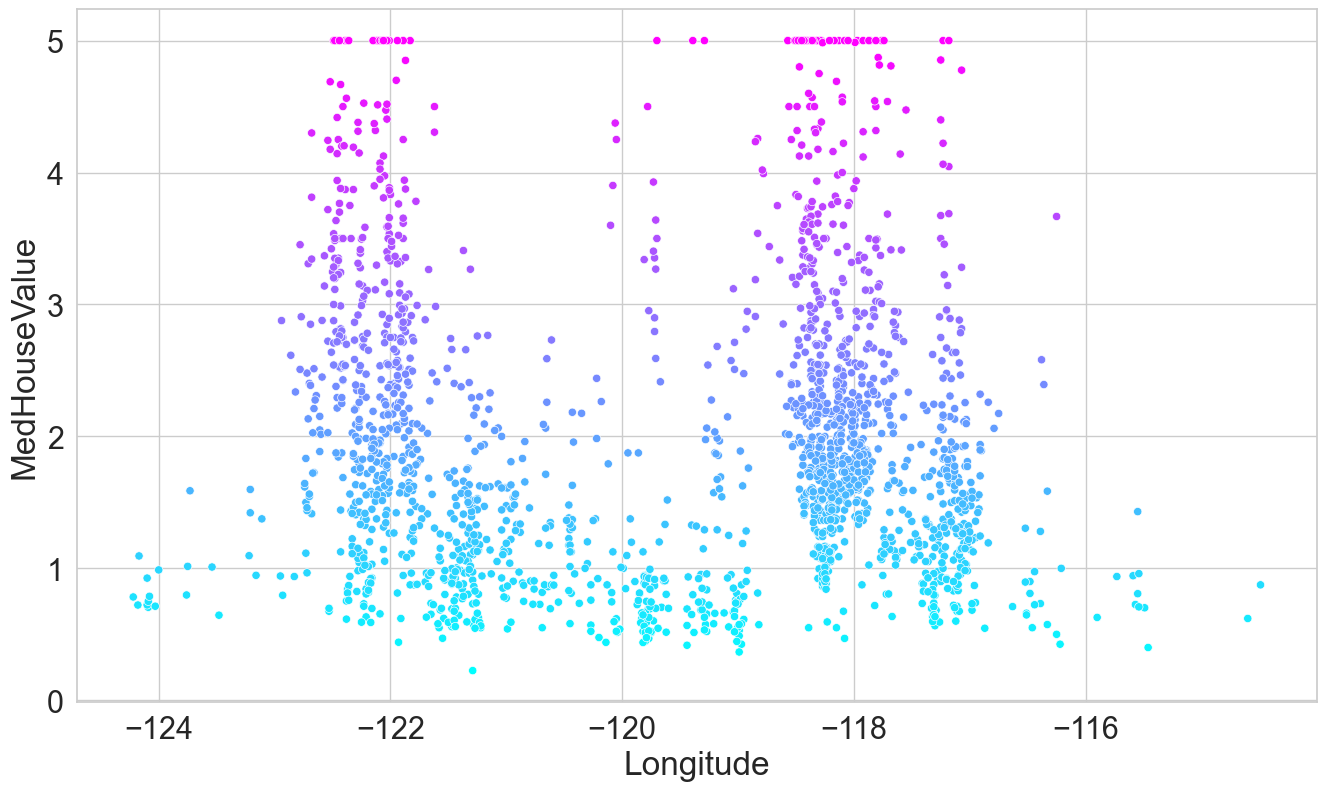

In [274]:
for feature in california.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, 
                     y='MedHouseValue', hue='MedHouseValue', 
                     palette='cool', legend=False)
         

## 15.5.4 Splitting the Data for Training and Testing 

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(
     california.data, california.target, random_state=11)

In [277]:
X_train.shape

(15480, 8)

In [278]:
X_test.shape

(5160, 8)

## 15.5.5 Training the Model 

In [279]:
from sklearn.linear_model import LinearRegression

In [280]:
linear_regression = LinearRegression()

In [281]:
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [282]:
for i, name in enumerate(california.feature_names):
     print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.43770302153822016
  HouseAge: 0.009216834565797695
  AveRooms: -0.1073252663736094
 AveBedrms: 0.6117133073918101
Population: -5.756822009296558e-06
  AveOccup: -0.0033845664657163226
  Latitude: -0.4194818609649083
 Longitude: -0.43377133498740217


In [283]:
linear_regression.intercept_

np.float64(-36.8829506560555)

## 15.5.6 Testing the Model 

In [284]:
predicted = linear_regression.predict(X_test)

In [285]:
expected = y_test

In [286]:
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [287]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

## 15.5.7 Visualizing the Expected vs. Predicted Prices 

In [288]:
df = pd.DataFrame()

In [289]:
df['Expected'] = pd.Series(expected)

In [290]:
df['Predicted'] = pd.Series(predicted)

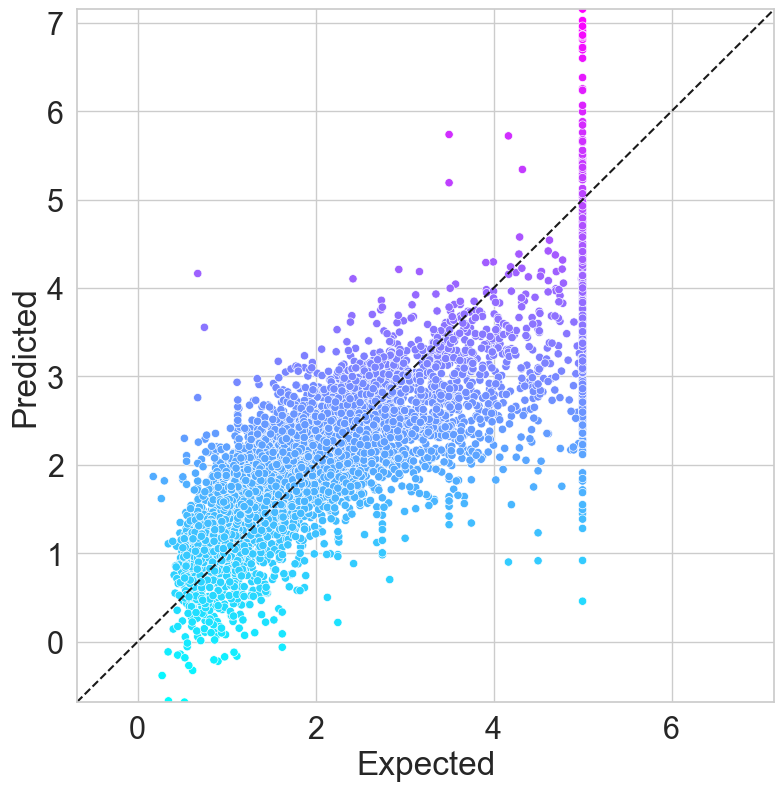

In [291]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
     hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

## 15.5.8 Regression Model Metrics 
 

In [292]:
from sklearn import metrics

In [293]:
metrics.r2_score(expected, predicted)

0.6008983115964331

In [294]:
metrics.mean_squared_error(expected, predicted)

0.535014977444912

## 15.5.9 Choosing the Best Model

In [295]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [296]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [297]:
from sklearn.model_selection import KFold, cross_val_score

In [298]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=california.data, y=california.target, cv=kfold,
         scoring='r2')
     print(f'{estimator_name:>16}: ' + 
           f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


### Exercise Summary: Model Evaluation and Testing

In this notebook, we evaluated the performance of a multiple linear regression model trained on the California housing dataset. The following tests and metrics were performed:

- **Prediction Comparison:** We generated predictions for the test set and compared them to the actual values, visualizing expected vs. predicted prices. This helps assess how well the model generalizes to unseen data.
- **R² Score:** The coefficient of determination (R²) was calculated to measure the proportion of variance in the target variable explained by the model. A higher R² indicates better predictive performance.
- **Mean Squared Error (MSE):** MSE was computed to quantify the average squared difference between predicted and actual values. Lower MSE values indicate more accurate predictions.
- **Model Selection:** We compared multiple regression estimators (LinearRegression, ElasticNet, Lasso, Ridge) using cross-validation and R² scores to identify the best model for this dataset.

These tests are crucial for understanding model accuracy, generalization ability, and for selecting the most suitable regression approach for predicting California housing prices.

# 15.6 Case Study: Unsupervised Machine Learning, Part 1—Dimensionality Reduction 
### Loading the Digits Dataset

**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [299]:
%matplotlib inline
from sklearn.datasets import load_digits

In [300]:
digits = load_digits()

### Creating a `TSNE` Estimator for Dimensionality Reduction

In [301]:
from sklearn.manifold import TSNE

In [302]:
tsne = TSNE(n_components=2, random_state=11)

### Transforming the Digits Dataset’s Features into Two Dimensions

In [303]:
reduced_data = tsne.fit_transform(digits.data)

In [304]:
reduced_data.shape

(1797, 2)

### Visualizing the Reduced Data

In [305]:
import matplotlib.pyplot as plt

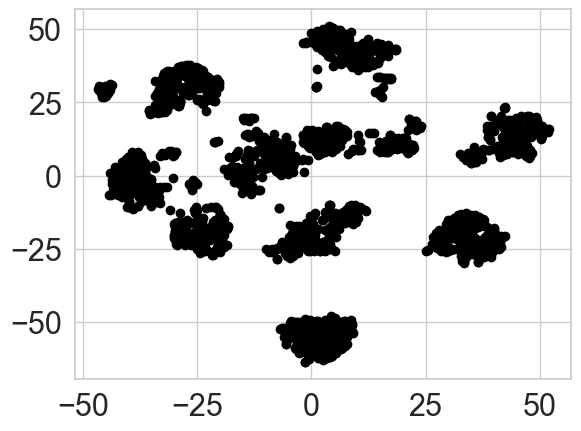

In [306]:
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                    c='black')
                    

### Visualizing the Reduced Data with Different Colors for Each Digit

C:\Users\angel\AppData\Local\Temp\ipykernel_3296\1707869149.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))


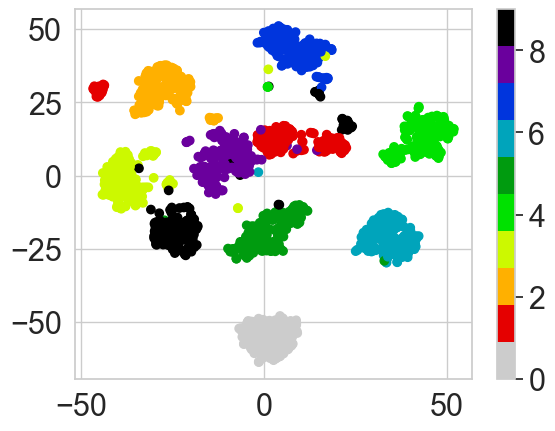

In [307]:
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
     c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

colorbar = plt.colorbar(dots)

## 15.7.1 Loading the Iris Dataset
**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [308]:
%matplotlib inline
from sklearn.datasets import load_iris

In [309]:
iris = load_iris()

In [310]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Checking the Numbers of Samples, Features and Targets

In [311]:
iris.data.shape

(150, 4)

In [312]:
iris.target.shape

(150,)

In [313]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [314]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 15.7.2 Exploring the Iris Dataset: Descriptive Statistics with Pandas

In [315]:
import pandas as pd

In [316]:
pd.set_option('display.max_columns', 5)

In [317]:
pd.set_option('display.width', None)

In [318]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [319]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [320]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [321]:
pd.set_option('display.precision', 2)

In [322]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [323]:
# Ensure 'species' column exists
if 'species' not in iris_df.columns:
	iris_df['species'] = [iris.target_names[i] for i in iris.target]

iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

## 15.7.3 Visualizing the Dataset with a Seaborn `pairplot` 

In [324]:
import seaborn as sns

In [325]:
sns.set(font_scale=1.1)

In [326]:
sns.set_style('whitegrid')

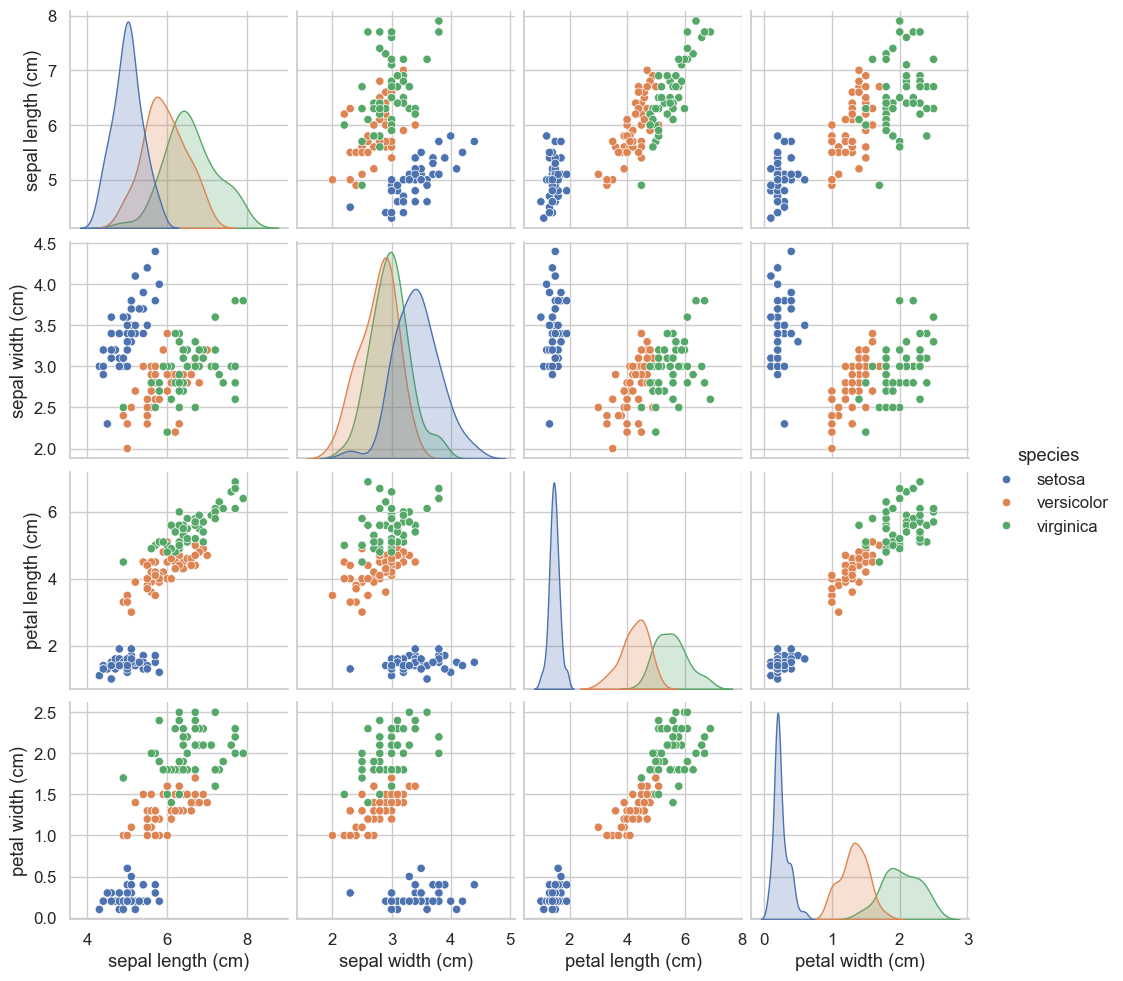

In [327]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='species')

### Displaying the pairplot in One Color

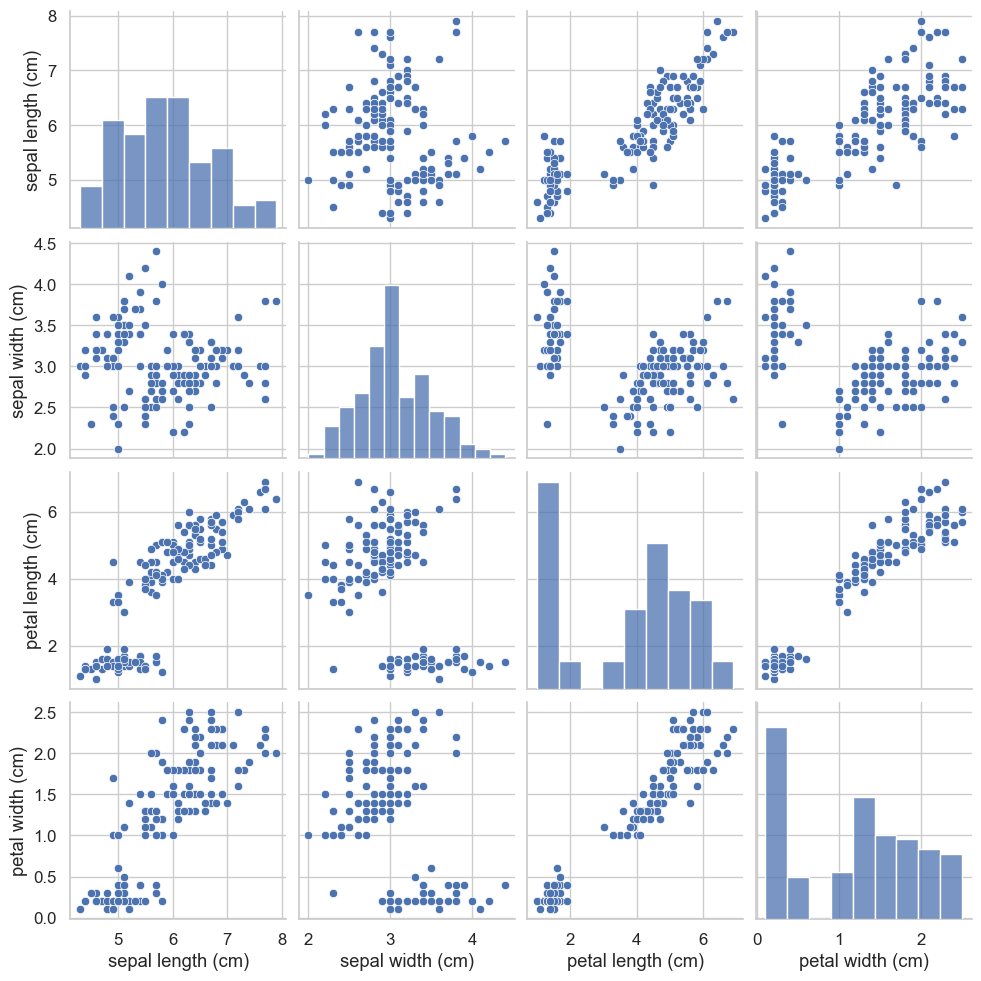

In [328]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

## 15.7.4 Using a `KMeans` Estimator
### Creating the Estimator

In [329]:
from sklearn.cluster import KMeans

In [330]:
kmeans = KMeans(n_clusters=3, random_state=11)

### Fitting the Model

In [331]:
kmeans.fit(iris.data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,11
,copy_x,True
,algorithm,'lloyd'


### Comparing the Computer Cluster Labels to the Iris Dataset’s Target Values

In [332]:
print(kmeans.labels_[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [333]:
print(kmeans.labels_[50:100])

[2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [334]:
print(kmeans.labels_[100:150])

[2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]


In [335]:
kmeans2 = KMeans(n_clusters=2, random_state=11)

In [336]:
kmeans2.fit(iris.data)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,11
,copy_x,True
,algorithm,'lloyd'


In [337]:
print(kmeans2.labels_[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [338]:
print(kmeans2.labels_[50:150])

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 15.7.5 Dimensionality Reduction with Principal Component Analysis
### Creating the PCA Object

In [339]:
from sklearn.decomposition import PCA

In [340]:
pca = PCA(n_components=2, random_state=11)

### Transforming the Iris Dataset’s Features into Two Dimensions

In [341]:
pca.fit(iris.data)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,11


In [342]:
iris_pca = pca.transform(iris.data)

In [343]:
iris_pca.shape

(150, 2)

### Visualizing the Reduced Data

In [344]:
iris_pca_df = pd.DataFrame(iris_pca, 
                            columns=['Component1', 'Component2'])

In [345]:
iris_pca_df['species'] = iris_df.species

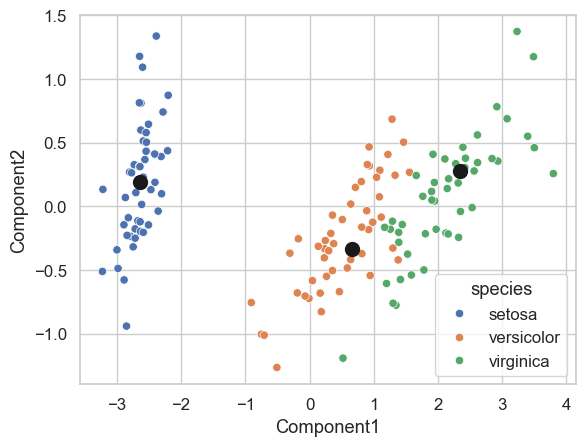

In [346]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
     y='Component2', hue='species', legend='brief') 

iris_centers = pca.transform(kmeans.cluster_centers_)

import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], 
                    s=100, c='k')

## 15.7.6 Choosing the Best Clustering Estimator

In [350]:
from sklearn.cluster import DBSCAN, MeanShift,\
     SpectralClustering, AgglomerativeClustering

In [351]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

In [352]:
import numpy as np

In [353]:
for name, estimator in estimators.items():
     estimator.fit(iris.data)
     print(f'\n{name}:')
     for i in range(0, 101, 50):
         labels, counts = np.unique(
             estimator.labels_[i:i+50], return_counts=True)
         print(f'{i}-{i+50}:')
         for label, count in zip(labels, counts):
             print(f'   label={label}, count={count}')
             


KMeans:
0-50:
   label=0, count=50
50-100:
   label=1, count=47
   label=2, count=3
100-150:
   label=1, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=0, count=50
50-100:
   label=2, count=50
100-150:
   label=1, count=35
   label=2, count=15

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35


# Notebook Summary and Findings
This combined notebook provided a structured walkthrough of several advanced analytical steps.

### Key Takeaways:
- Demonstrated a clear workflow for importing, cleaning, and exploring datasets.
- Illustrated statistical and visualization techniques for data insight extraction.
- Applied case studies (e.g., NYC temperature data) to practice real-world analytics.
- Built towards more advanced methods, such as modeling and interpretive summaries.

Overall, this integrated notebook serves as a capstone exercise in applied Python-based data analysis, reinforcing data handling, visualization, and analytical storytelling skills.

In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################
